<a href="https://colab.research.google.com/github/ibadurrehman1/Cat_and_dog/blob/master/CAT_AND_DOG_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from zipfile import ZipFile
file_name ="/content/drive/MyDrive/cat_and_dog_data.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('finish')

finish


In [3]:
!pip install -q keras

In [22]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,MaxPool2D,Conv2D

In [23]:
classifier=Sequential()
classifier.add(Conv2D(32,(3,3),input_shape=(150,150,3),activation="relu"))
classifier.add(MaxPool2D())
classifier.add(Conv2D(16,(3,3),activation="relu"))
classifier.add(MaxPool2D())
classifier.add(Flatten())
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=1, activation='sigmoid'))

In [24]:
classifier.compile(optimizer ='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [25]:
classifier.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 16)        4624      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 36, 16)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 20736)             0         
                                                                 
 dense_8 (Dense)             (None, 128)              

In [26]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/dataset/training_set',
                                                 target_size = (150,150),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('/content/dataset/test_set',
                                            target_size = (150,150),
                                            batch_size = 32,
                                            class_mode = 'binary')



Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [27]:
print(len(training_set))
len(test_set)

250


63

In [28]:
history=classifier.fit(training_set,
                                 steps_per_epoch=len(training_set),
                                 epochs = 50,
                                 validation_data = test_set,
                                 validation_steps=len(test_set)
              )

Epoch 1/50
250/250 [==============================] - 70s 274ms/step - loss: 0.6906 - accuracy: 0.5396 - val_loss: 0.6450 - val_accuracy: 0.6235
Epoch 2/50
250/250 [==============================] - 67s 267ms/step - loss: 0.6250 - accuracy: 0.6490 - val_loss: 0.5815 - val_accuracy: 0.6940
Epoch 3/50
250/250 [==============================] - 68s 273ms/step - loss: 0.5744 - accuracy: 0.6975 - val_loss: 0.5721 - val_accuracy: 0.7165
Epoch 4/50
250/250 [==============================] - 66s 266ms/step - loss: 0.5514 - accuracy: 0.7205 - val_loss: 0.5276 - val_accuracy: 0.7450
Epoch 5/50
250/250 [==============================] - 70s 280ms/step - loss: 0.5234 - accuracy: 0.7418 - val_loss: 0.5053 - val_accuracy: 0.7445
Epoch 6/50
250/250 [==============================] - 68s 272ms/step - loss: 0.4986 - accuracy: 0.7566 - val_loss: 0.4825 - val_accuracy: 0.7655
Epoch 7/50
250/250 [==============================] - 66s 265ms/step - loss: 0.4770 - accuracy: 0.7751 - val_loss: 0.4925 - val_ac

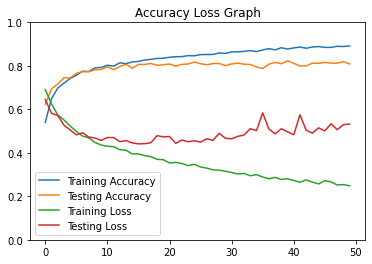

In [38]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label="Training Accuracy")
plt.plot(history.history['val_accuracy'],label="Testing Accuracy")
plt.plot(history.history['loss'],label="Training Loss")
plt.plot(history.history['val_loss'],label="Testing Loss")
plt.legend()
plt.title("Accuracy Loss Graph")
plt.ylim([0,1])
plt.show()

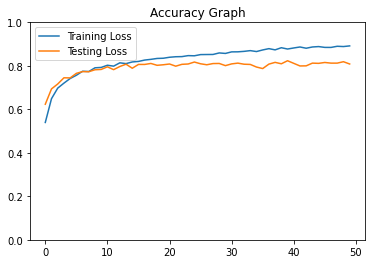

In [36]:
plt.plot(history.history['accuracy'],label="Training Loss")
plt.plot(history.history['val_accuracy'],label="Testing Loss")
plt.legend()
plt.title("Accuracy Graph")
plt.ylim([0,1])
plt.show()